<H1><center> Measure granularity using cellpose segmentation </center></H1>
<p> The goal here is to calculate granularity from input image. The measure will be used late for training a bayes' model. 

In [1]:
import matplotlib.pyplot as plt
import tifffile as tfi
import numpy as np
from PIL import Image
import plotly.express as px
from skimage.filters import threshold_local
from scipy.ndimage.morphology import binary_opening
from skimage import io, filters, measure, color, img_as_ubyte
import skimage.morphology as sm
from skimage.segmentation import watershed
from skimage import measure
from skimage.exposure import rescale_intensity
import os
import pandas as pd
from scipy.ndimage.morphology import binary_fill_holes
import base64
from datetime import datetime
import timeit
import glob
import seaborn as sns
os.chdir(r'F:\HAB_2\PrinzScreen\Deploy')
from utils import AIPS_module as ai
from utils import AIPS_functions as af
from utils import AIPS_granularity as ag
from utils import AIPS_file_display as afd
from utils import AIPS_cellpose as AC

F:\Gil\anaconda\envs\pymc3_cellpose_dash\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *
F:\Gil\anaconda\envs\pymc3_cellpose_dash\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
path_input = r'F:\HAB_2\PrinzScreen\Deploy\testData'
file = 'exp001_13DKO_2-1.tif'

AIPS_pose_object = AC.AIPS_cellpose(Image_name = file, path= path_input, model_type="cyto", channels=[0,0])
img = AIPS_pose_object.cellpose_image_load()

# create mask for the entire image
mask, table = AIPS_pose_object.cellpose_segmantation(image_input=img[0])

In [25]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

<AxesSubplot:xlabel='area', ylabel='Count'>

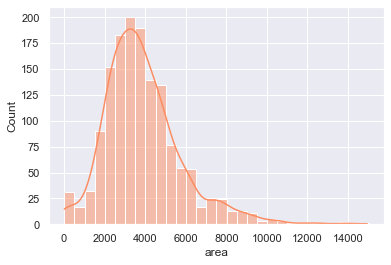

In [28]:
sns.set()
sns.histplot(data = table, x = 'area', kde = True,color = sns.color_palette("Set2")[1],binwidth = 500)

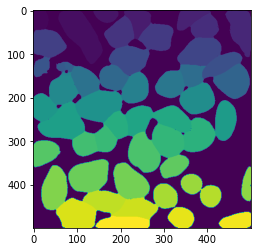

In [2]:
path_input = r'F:\HAB_2\PrinzScreen\Deploy\testData'
file = 'exp001_13DKO_2-1.tif'

AIPS_pose_object = AC.AIPS_cellpose(Image_name = file, path= path_input, model_type="cyto", channels=[0,0])
img = AIPS_pose_object.cellpose_image_load()

mask, table = AIPS_pose_object.cellpose_segmantation(image_input=img[0,200:700,200:700])
plt.imshow(mask)

In [22]:
table

,area,centroid-0,centroid-1
label,,,
1,1435,22.708711,16.668293
2,6644,54.277845,110.885611
3,1323,12.146636,167.991686
4,2471,24.797653,241.995548
5,2107,18.306122,358.981965
6,4241,43.906626,476.283424
7,2674,39.046746,394.685116
8,3402,53.074368,199.647266
9,3816,61.829140,284.396226


In [3]:
dipObject = afd.Compsite_display(input_image=img[0,200:700,200:700], mask_roi=mask)
PIL_image = dipObject.display_image_label( table = table, font_select = "arial.ttf", font_size = 24)
plt.imshow(PIL_image)

TypeError: display_image_label() missing 1 required positional argument: 'contour'

In [24]:
# remove cell index 41
table.drop([41,50,46], inplace=True)
#np.unique(mask.ravel())
table

,area,centroid-0,centroid-1
label,,,
1,1435,22.708711,16.668293
2,6644,54.277845,110.885611
3,1323,12.146636,167.991686
4,2471,24.797653,241.995548
5,2107,18.306122,358.981965
6,4241,43.906626,476.283424
7,2674,39.046746,394.685116
8,3402,53.074368,199.647266
9,3816,61.829140,284.396226


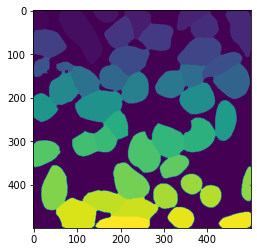

In [20]:
labels = [31,30,32]
for label in labels:
    mask[mask==label]=0
plt.imshow(mask)

In [4]:
# test Object removal function
path_input = r'F:\HAB_2\PrinzScreen\Deploy\testData'
file = 'exp001_13DKO_2-1.tif'
AIPS_pose_object = AC.AIPS_cellpose(Image_name = file, path= path_input, model_type="cyto", channels=[0,0])
img = AIPS_pose_object.cellpose_image_load()
mask, table = AIPS_pose_object.cellpose_segmantation(image_input=img[0,200:700,200:700])
# dipObject = afd.Compsite_display(input_image=img[0,200:700,200:700], mask_roi=mask)
# PIL_image = dipObject.display_image_label( table = table, font_select = "arial.ttf", font_size = 24)
# plt.imshow(PIL_image)

In [5]:
dipObject = afd.Compsite_display(input_image=img[0,200:700,200:700], mask_roi=mask)
counter = dipObject.draw_ROI_contour(channel=None)

In [6]:
temp = dipObject.display_image_label( table = table, font_select = "arial.ttf", font_size = 24,contour=True,intensity = 2)

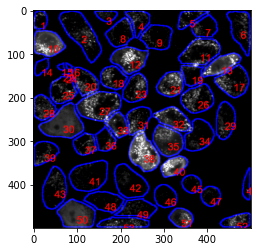

In [7]:
plt.imshow(temp)

In [10]:
objectidx = table.loc[table['area'] < 500,:].index.tolist() 

In [11]:
mask, table = AIPS_pose_object.removeObjects(objectList = objectidx)
dipObject = afd.Compsite_display(input_image=img[0,200:700,200:700], mask_roi=mask)
finalImage = dipObject.draw_ROI_contour(channel=None)
temp = dipObject.display_image_label(table = table, font_select = "arial.ttf", font_size = 24,contour=True,intensity = 3)
plt.imshow(temp)

TypeError: cannot unpack non-iterable NoneType object